In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

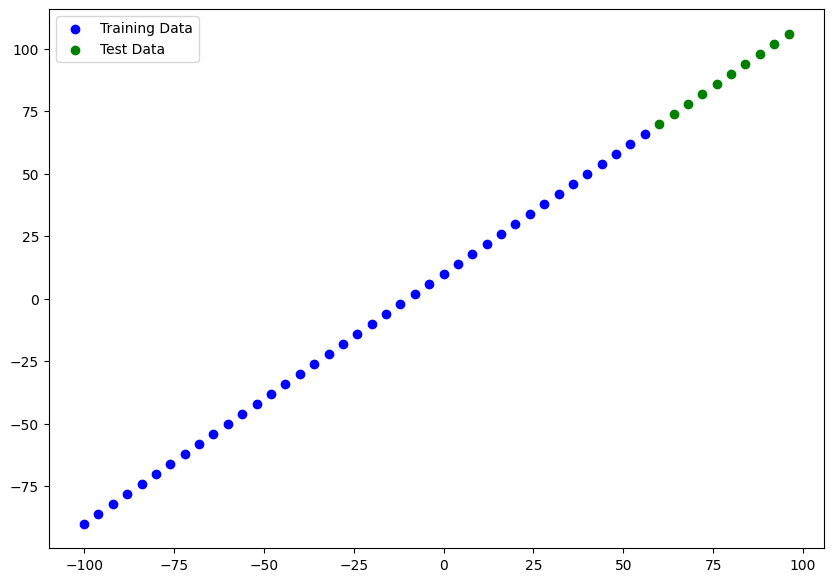

In [2]:
X = tf.range(-100, 100, 4)
y= X + 10

X_train = X[:40]
y_train = y[:40]

X_test= X[40:]
y_test= y[40:]

plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c="b", label= "Training Data")
plt.scatter(X_test, y_test, c="g", label="Test Data")

plt.legend();


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate= 0.01),
              metrics=["mae"])

model.fit(X, y, epochs=100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 51.1322 - mae: 51.1322
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 38.3747 - mae: 38.3747
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 20.5540 - mae: 20.5540
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.6226 - mae: 9.6226 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.5643 - mae: 12.5643 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 18.3156 - mae: 18.3156
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 17.1163 - mae: 17.1163 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.0426 - mae: 12.0426
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 9.3101 - mae: 9.3101
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.5142 - mae: 8.5142
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.7954 - mae: 10.7954
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.7374 - mae: 10.7374
Epoch 13/100
2/2 ━━━━━━━━━━━

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

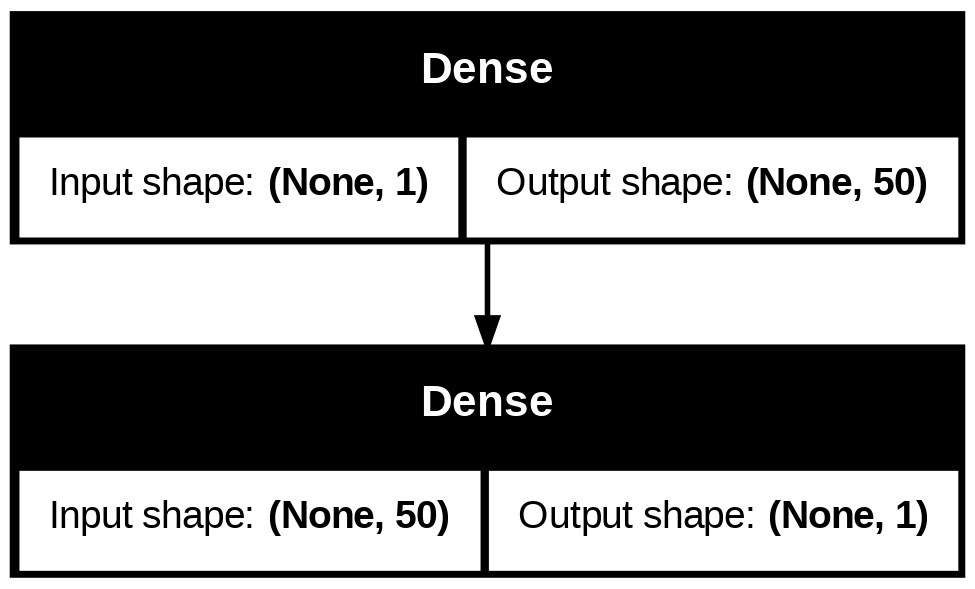

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [6]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[ 70.1586  ],
       [ 74.169815],
       [ 78.181046],
       [ 82.19226 ],
       [ 86.203476],
       [ 90.2147  ],
       [ 94.225914],
       [ 98.237144],
       [102.24836 ],
       [106.259575]], dtype=float32)

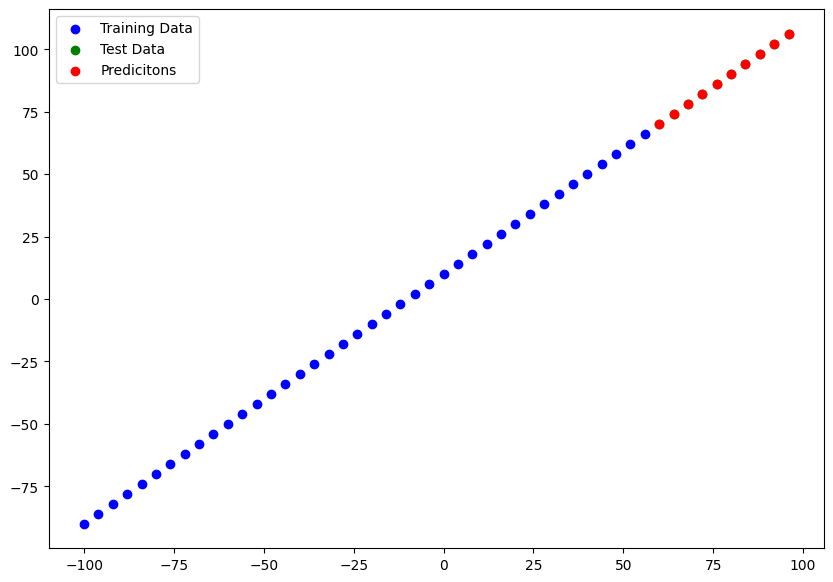

In [7]:
def plot_prediction(train_data= X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels= y_test,
                    predictions= y_pred):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", label= "Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  plt.scatter(test_data, predictions, c="r", label= "Predicitons")

  plt.legend();

plot_prediction()

In [8]:
model.evaluate(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 0.2091 - mae: 0.2091


[0.20908889174461365, 0.20908889174461365]

In [9]:
mae_loss = tf.keras.losses.MeanAbsoluteError()
mae = mae_loss(y_test, y_pred).numpy()

mae

np.float32(0.20908889)

In [10]:
mse_loss = tf.keras.losses.MeanSquaredError()
mse = mse_loss(y_test, y_pred).numpy()
mse

np.float32(0.044756703)

In [11]:
def mae(y_test, y_pred):
  return tf.keras.losses.mae(y_true=y_test,
                             y_pred=tf.squeeze(y_pred))


def mse (y_test, y_pred):
  return tf.keras.losses.mse(y_true=y_test,
                             y_pred=tf.squeeze(y_pred))

In [12]:
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.20908889174461365>

In [13]:
model.save("Model_01.keras")

In [14]:
Loaded_Saved_Model_01 = tf.keras.models.load_model("/content/Model_01.keras")

In [15]:
model.predict(X_test) == Loaded_Saved_Model_01.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [16]:
mae(y_test,  model.predict(X_test)) == mae(y_test, Loaded_Saved_Model_01.predict(X_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [17]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:

!git clone https://github.com/AttaabManzil/classification-model-practice.git


Cloning into 'classification-model-practice'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 3), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 709.92 KiB | 2.73 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [19]:
!git config --global user.email "attaabmanzil@gmail.com"
!git config --global user.name "AttaabManzil"

In [20]:

%cd /content/classification-model-practice/


!cp "/content/drive/MyDrive/Colab Notebooks/01_TensorFlow.ipynb" .



/content/classification-model-practice
